In [25]:
import numpy as np
import os
import segyio
import pandas as pd

from pyfrac.visualisation.plotting_support import explode_volume
from pyfrac.visualisation.traceviz import wiggleplot, traceimage

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
seispath = '/home/birniece/Documents/Projects/MicroseismicModelling/ShaheenTransfers/INCOMING/LargeRockBlock/outputs/su'


# PARAMETERS TO BE DEFINED

In [4]:
nr = 38*38*6

# SEISMOGRAMS

In [5]:
def read_seis(seisfile, nr):
    # s_wave_file = os.path.join(data_path,'test.bin.curl')
    seis_flat = np.loadtxt(seisfile)

    # determine number of timesamples and ensure it saved fully
    nt = int(seis_flat.shape[0] / nr)
    try:
        seis_flat.reshape((nr, nt))
    except:
        print('Not good dims \n nt:%i nr:%i \n vz flat:%i' % (nt, nr, seis_flat.shape[0]))

    # Resample to 2D
    seis = seis_flat[:nt * nr].reshape((nr, nt))
    return seis

In [6]:
# p = read_seis(os.path.join(seispath,'%s_div.txt'%expname), nr)
# vx = read_seis(os.path.join(seispath,'%s_vx.txt'%expname), nr)
vy = read_seis(os.path.join(seispath,'SourceArray_explosiveXfrac_p.txt'), nr)
# vz = read_seis(os.path.join(seispath,'%s_vz.txt'%expname), nr)

# nr=180
# seisfile = '/home/birniece/Documents/Projects/MicroseismicModelling/ShaheenTransfers/INCOMING/explosive_multishot/UtahFORGE_GriddedRecs/outputs/su/multishot_group00_vz.txt.shot1'
# vx = read_seis(seisfile, nr)


In [7]:
vy.shape

(8664, 60000)

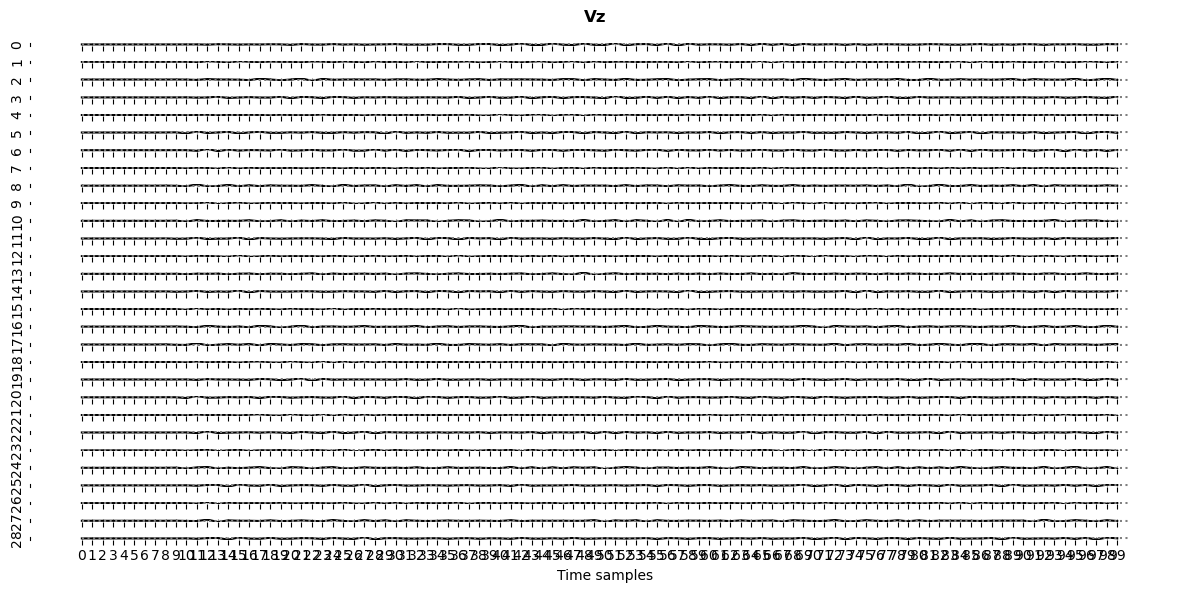

In [8]:
fig,axs = wiggleplot(vy[:38*38:50,0:100], norm_indiv=True);
fig.suptitle('Vz', fontweight='bold')
plt.tight_layout()

<Axes: title={'center': 'Seismic Recording'}, xlabel='Receiver #', ylabel='Time'>

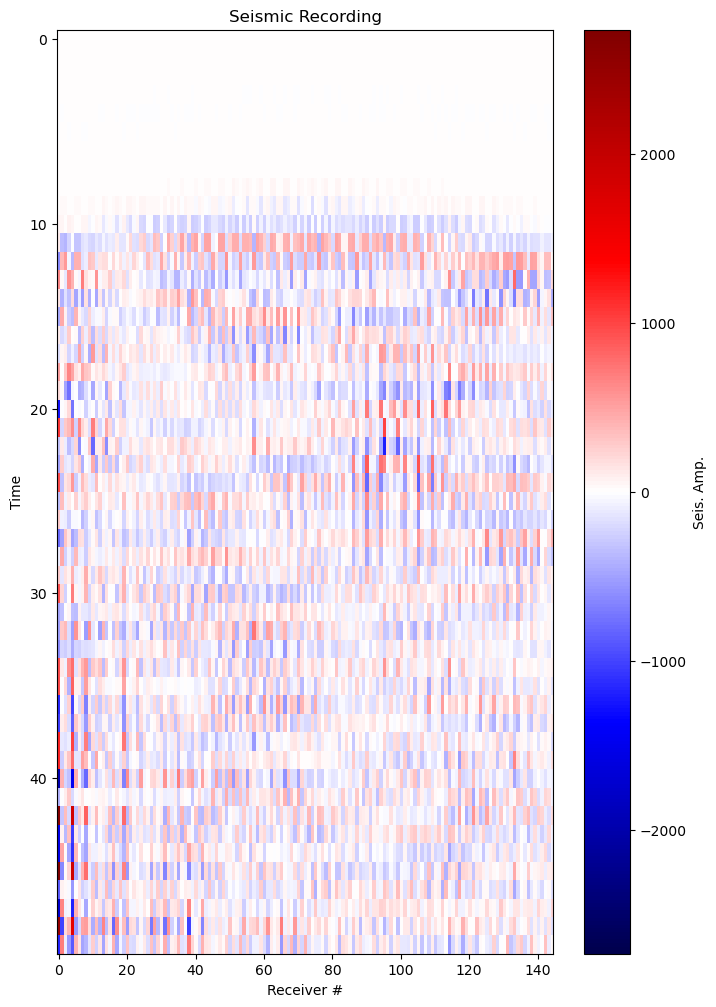

In [9]:
traceimage(vy[:38*38:10,0:50], climQ=100, figsize=[8,12])

# Put into lines

In [29]:
nt = vy.shape[1]

In [10]:
data_dir = '/home/birniece/Documents/data/ANPERC_Lab/LargeRockBlock/Sandstone'
recgeom = np.loadtxt(os.path.join(data_dir,'RecArray_fullcoverage.dat'))

In [11]:
recgeom

array([[0.01, 0.02, 0.02],
       [0.01, 0.02, 0.03],
       [0.01, 0.02, 0.04],
       ...,
       [0.37, 0.39, 0.4 ],
       [0.38, 0.39, 0.4 ],
       [0.39, 0.39, 0.4 ]])

In [63]:
faceA = 0.01
faceB = 0.4
id_map = np.round(np.arange(0.02,0.4,0.01), decimals=2)
print(id_map)

[0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14 0.15
 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29
 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39]


In [64]:
recgeom_dlist = []

for i,r in enumerate(recgeom):
    # Line 1: Fixed x 
    if r[0]==faceA or r[0]==faceB: L1id=999
    else: 
        print(r[0])
        L1id=np.argwhere(id_map==r[0])[0][0]
    
    # Line 2: Fixed y 
    if r[1]==faceA or r[1]==faceB: L2id=999
    else: L2id=np.argwhere(id_map==r[1])[0][0]
    
    # Line 3: Fixed z 
    if r[2]==faceA or r[2]==faceB: L3id=999
    else:
        L3id=np.argwhere(id_map==r[2])[0][0]
    # print(L1id, L2id, L3id)

    recgeom_dlist.append({'Rid':i, 'L1id':L1id, 'L2id':L2id, 'L3id':L3id})
    

0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0

In [70]:
linesDF = pd.DataFrame(recgeom_dlist)
L1data = np.zeros([len(id_map), nt])
L2data = np.zeros([len(id_map), nt])
L3data = np.zeros([len(id_map), nt])

In [71]:
linesDF.head()

,Rid,L1id,L2id,L3id
0,0,999,0,0
1,1,999,0,1
2,2,999,0,2
3,3,999,0,3
4,4,999,0,4


In [73]:
for i in range(len(id_map)):
    # line 1
    L1RecSubset = linesDF[linesDF['L1id']==i]
    if len(L1RecSubset)!=0: 
        L1data[i] += vy[L1RecSubset.Rid.values[0]]
    # line 2
    L2RecSubset = linesDF[linesDF['L2id']==i]
    if len(L2RecSubset)!=0: 
        L2data[i] += vy[L2RecSubset.Rid.values[0]]
    # line 3
    L3RecSubset = linesDF[linesDF['L3id']==i]
    if len(L3RecSubset)!=0: 
        L3data[i] += vy[L3RecSubset.Rid.values[0]]

In [ ]:
# Save Lines


# LOOKING AROUND EVENT TIMES

In [85]:
fs_kHz = 100
fs = fs_kHz * 1000
rec_dt = 1/fs

rec_t = np.arange(0,vy.shape[1]*rec_dt - rec_dt, rec_dt)
rec_t.shape

(60000,)

In [88]:
rec_t[-20:]

array([0.5998 , 0.59981, 0.59982, 0.59983, 0.59984, 0.59985, 0.59986,
       0.59987, 0.59988, 0.59989, 0.5999 , 0.59991, 0.59992, 0.59993,
       0.59994, 0.59995, 0.59996, 0.59997, 0.59998, 0.59999])

In [92]:
dx = 0.01
fs_kHz = 100
fs = fs_kHz * 1000
frac_dur = 0.5 # second
grid_sx_locs = np.round(np.arange(0.01,0.2000001,dx)[::-1], decimals=2)
ignition_times = np.round(np.linspace((1/fs),(1/fs) + frac_dur,len(grid_sx_locs)), decimals=4)

In [93]:
ignition_times

array([0.    , 0.0263, 0.0526, 0.079 , 0.1053, 0.1316, 0.1579, 0.1842,
       0.2105, 0.2369, 0.2632, 0.2895, 0.3158, 0.3421, 0.3684, 0.3947,
       0.4211, 0.4474, 0.4737, 0.5   ])

In [110]:
np.where(rec_t == ignition_times[2])

(array([5260]),)

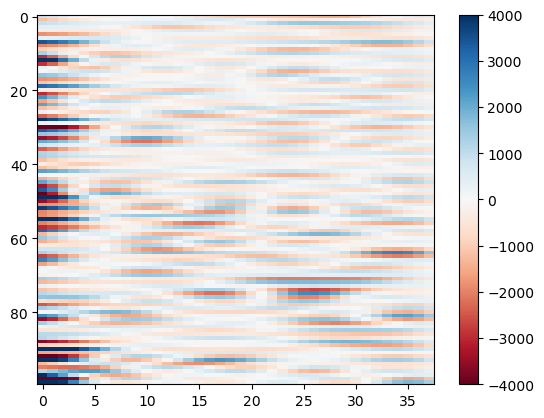

In [102]:
plt.imshow(L3data[:,2630-50:2630+50].T, aspect='auto', cmap='RdBu', vmin=-4000, vmax=4000)
plt.colorbar()

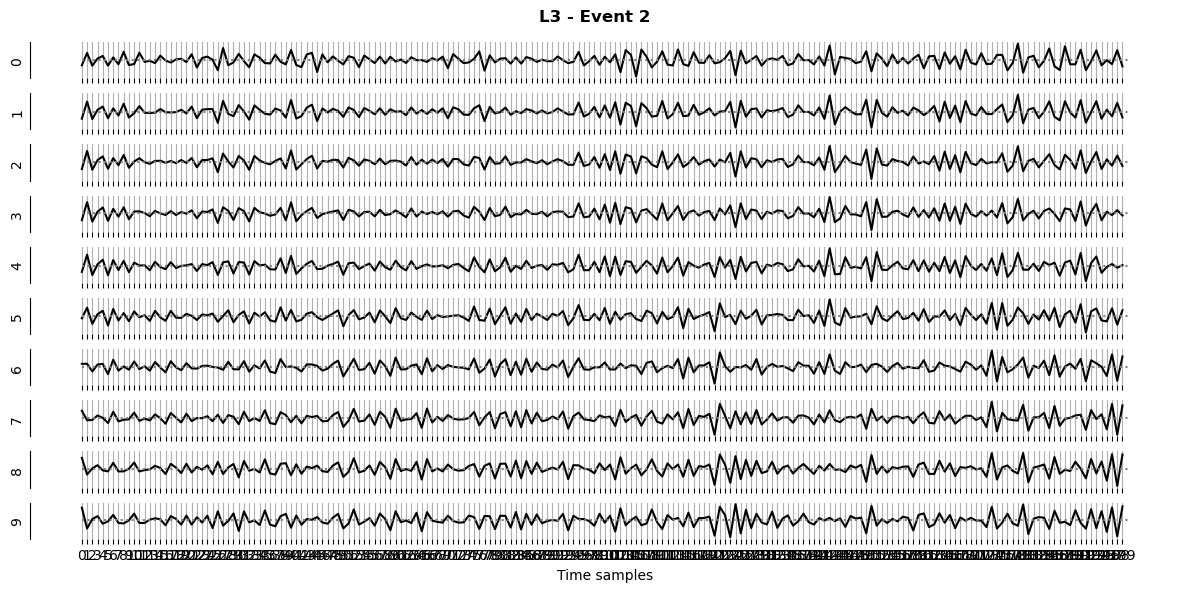

In [111]:
fig,axs = wiggleplot(L3data[15:25,2630-100:2630+100], norm_indiv=True);
fig.suptitle('L3 - Event 2', fontweight='bold')
plt.tight_layout()

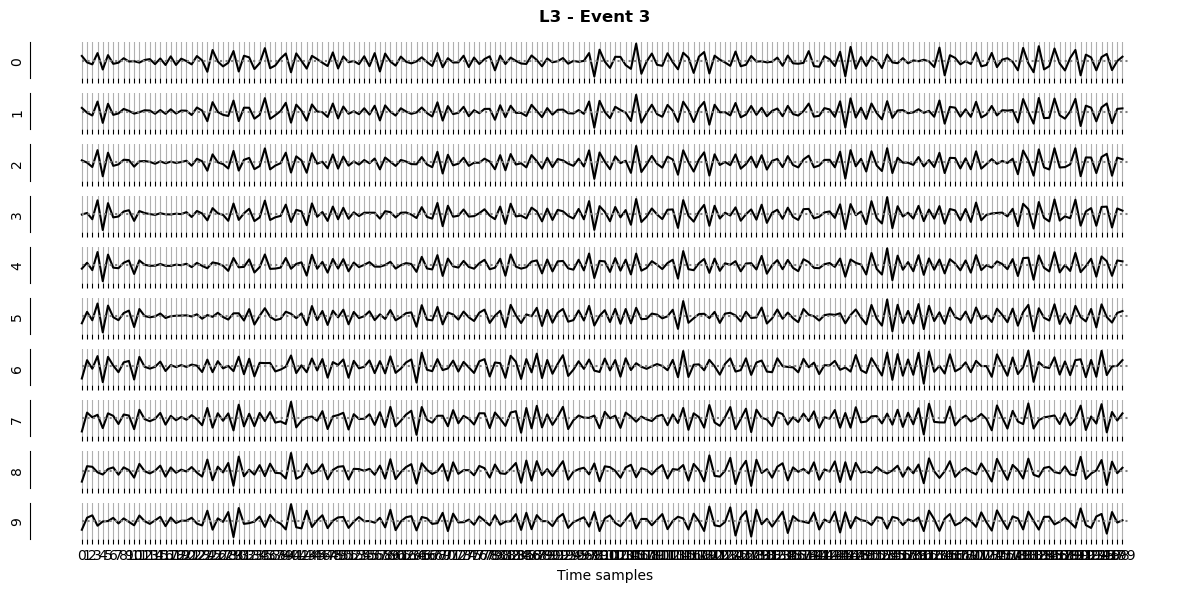

In [112]:
fig,axs = wiggleplot(L3data[15:25,5260-100:5260+100], norm_indiv=True);
fig.suptitle('L3 - Event 3', fontweight='bold')
plt.tight_layout()